<a href="https://colab.research.google.com/github/Dave-code-creater/AI/blob/main/Model/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import relate package
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

!pip install kaggle


In [21]:
# Load datase
import os
from google.colab import drive
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 111MB/s]


In [23]:
# Extracting data from the zip file
import zipfile

file_path = "housedata.zip"

!mv housedata.zip "/content/drive/MyDrive/kaggle/"

# Define the path to your zip file
file_path = '/content/drive/MyDrive/kaggle/housedata.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(f'/content/drive/MyDrive/kaggle/{file_path}')  # Replace 'destination_folder' with your desired folder

!rm /content/drive/MyDrive/kaggle/housedata.zip

In [24]:
# View data and evaluate

## Load data from csv file into pd
df = pd.read_csv("/content/drive/MyDrive/kaggle/housedata/data.csv",index_col=False)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


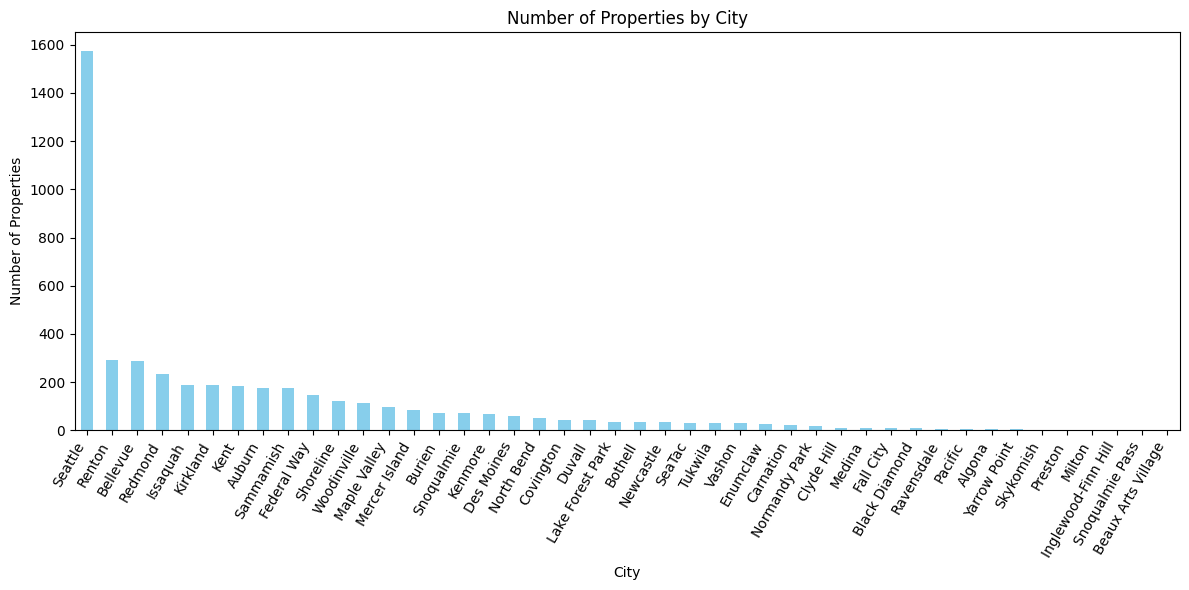

In [25]:
# Presenting data of the house for each city

city_counts = df['city'].value_counts()

# Plotting the column chart
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Properties by City')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [27]:
# Encode columns that have string type and preprocessingg data
le = preprocessing.LabelEncoder()

y = df['price']
df = df.drop(columns=["price"])
X = df.apply(le.fit_transform)


In [28]:
# Splite test set and validate set
print(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_test),len(X_train))

4600
920 3680


In [ ]:
# Implement a model

RFC = RandomForestRegressor(n_estimators=1000,random_state=0)

RFC.fit(X_train,y_train)
y_pred_100 = RFC.predict(X_test)

print("Predicted Value | True Value")
print("-" * 30)
for pred, true in zip(y_pred_100, y_test):
    print(f"{pred} | {true}")

# Alternatively, you can calculate the model accuracy score using y_test and y_pred_100
accuracy = RFC.score(X_test, y_test)


In [35]:
print(f"Model accuracy score with 1000 decision-trees: {accuracy * 100}")

Model accuracy score with 1000 decision-trees: 4.3204516219251925
